# Section 2: Visualisations

## Objectives:

 This visualisations notebook expands on the ETL notebook. It uses the cleaned data "corals_worldwide_dataset_cleaned.csv" 
 to create advanced visualisations for investigating the Coral Reef dataset.

## Input Data:

The input data can be found under "Dataset/cleaned/ "
The name of the file is called:

"corals_worldwide_dataset_cleaned.csv"

___

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder

* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/danielledelouw/Documents/code_institute/Coral_Reef_AI/Coral_Reef_AI/jupyter_notebooks'

We want to make the parent of the current directory the new current directory

* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/Users/danielledelouw/Documents/code_institute/Coral_Reef_AI/Coral_Reef_AI'

## Load Python Libraries

In [4]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.io as pio


In [5]:
pip install plotly


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Load Cleaned Data:

In [6]:
df = pd.read_csv('Dataset/cleaned/corals_worldwide_dataset_cleaned.csv')
df

,name,salinity,January_temp,June_temp,area,latitude,longitude,type_of_sea,corals,silt_or_sulfide
0,Adriatic Sea,38.298527,15.658799,20.855299,138000,43,15,2,1,0
1,Adriatic Sea,38.304909,16.297098,19.501200,138000,43,15,2,1,0
2,Adriatic Sea,38.462040,16.251598,19.028500,138000,43,15,2,1,0
3,Adriatic Sea,38.121601,15.709500,22.882999,138000,43,15,2,1,0
4,Adriatic Sea,38.519196,15.733400,21.824799,138000,43,15,2,1,0
...,...,...,...,...,...,...,...,...,...,...
2446,Yellow Sea,31.611076,8.349999,19.500000,380000,38,123,3,0,1
2447,Yellow Sea,31.468084,8.441801,19.800000,380000,38,123,3,0,1
2448,Yellow Sea,31.600788,8.432699,20.700000,380000,38,123,3,0,1
2449,Yellow Sea,31.533226,8.102799,19.000000,380000,38,123,3,0,1


In [7]:
# Filtering out the text columns as I only want to display the numerical columns
# and the columns that are relevant for the analysis.
# The columns 'corals' and 'silt_or_sulfide' are categorical, but they are included
# because they are relevant for the analysis.
# The columns 'salinity', 'January_temp', 'June_temp', 'area', 'latitude', 'longitude',
# 'type_of_sea', 'corals', and 'silt_or_sulfide' are the numerical columns that are relevant
# for the analysis.
df_sub = df[['salinity', 'January_temp', 'June_temp', 'area', 'latitude', 'longitude', 
             'type_of_sea', 'corals', 'silt_or_sulfide' ]]
df_sub

,salinity,January_temp,June_temp,area,latitude,longitude,type_of_sea,corals,silt_or_sulfide
0,38.298527,15.658799,20.855299,138000,43,15,2,1,0
1,38.304909,16.297098,19.501200,138000,43,15,2,1,0
2,38.462040,16.251598,19.028500,138000,43,15,2,1,0
3,38.121601,15.709500,22.882999,138000,43,15,2,1,0
4,38.519196,15.733400,21.824799,138000,43,15,2,1,0
...,...,...,...,...,...,...,...,...,...
2446,31.611076,8.349999,19.500000,380000,38,123,3,0,1
2447,31.468084,8.441801,19.800000,380000,38,123,3,0,1
2448,31.600788,8.432699,20.700000,380000,38,123,3,0,1
2449,31.533226,8.102799,19.000000,380000,38,123,3,0,1


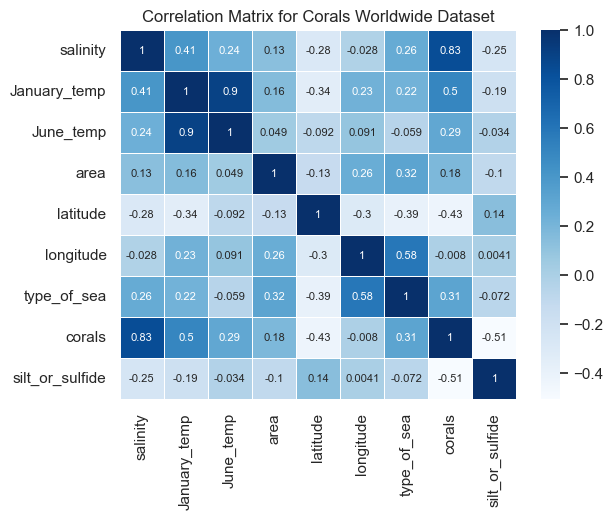

In [8]:
#heatmap for correlation matrix
sns.set_theme(style="whitegrid")
df_corr = df_sub.corr()
sns.heatmap(data=df_corr, annot=True, linewidths=0.5, annot_kws={"size": 8},cmap='Blues')
plt.title('Correlation Matrix for Corals Worldwide Dataset')
plt.show()

# Description of the heatmap:
#The heatmaps show the correlation between the numerical columns in the dataset.
# I am particularly interested in the correlation between 'corals' and the other numerical columns.
# As it indicates where the corals are present or not.
# The correlation matrix shows that 'salinity' has the strongest positive correlation with corals,
# followed by 'silt_or_sulfide' having a negative strong correlation. This is good to know because the 
# presence of silt/sulfide can impact and degrade reef health and coral growth. The salinity levels are also important, 
# which is shown by the positive correlation with corals.
# January and June temperatures also have a positive correlation with corals, with January having a higher correlation.
# Latitude has a negative correlation at -0.43, which also suggests an inverse relationship with corals.
# January_temp and June_temp have a high postive correlation with each other at 0.9.
# Type_of_sea and longitude have a mid high positive correlation with each other, 
# which could possibly indicate a specific region where corals exist. 

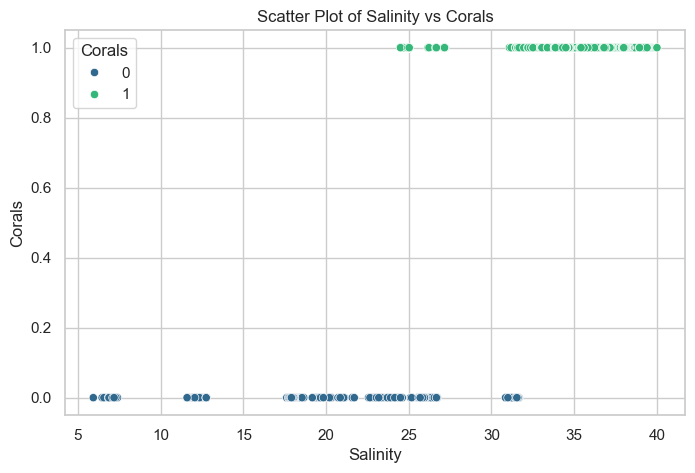

In [9]:
# Create a scatter plot to visualize the relationship between salinity and corals, colored by 'corals' presence.
plt.figure(figsize=(8, 5))
scatter = sns.scatterplot(
    data=df_sub,
    x='salinity',
    y='corals',
    hue='corals',           # Color dots by 'corals' value
    palette='viridis',      # Use a color palette
    legend='full'
)
plt.title('Scatter Plot of Salinity vs Corals')
plt.xlabel('Salinity')
plt.ylabel('Corals')
plt.legend(title='Corals', loc='best')
plt.show()

# Explanation of the scatter plot:
# By the Scatter plot, we can see that corals=0 (no corals) are more prevalent at lower salinity levels,
# while corals=1 (presence of corals) are more prevalent at higher salinity levels.
# There is an overlapping region at salinity 24-27 where both corals=0 and corals=1 are present.
# This suggests that while salinity is an important factor, it is not the only one influencing coral presence.

In [10]:
# Create two DataFrames: one for salinity where corals are present (1), and one where corals are absent (0).
# I want to analyse the overlap better
df_saline_coral_yes = df[df['corals'] == 1][['salinity']]
df_saline_coral_no = df[df['corals'] == 0][['salinity']]
df_saline_coral_yes.head()

,salinity
0,38.298527
1,38.304909
2,38.462040
3,38.121601
4,38.519196


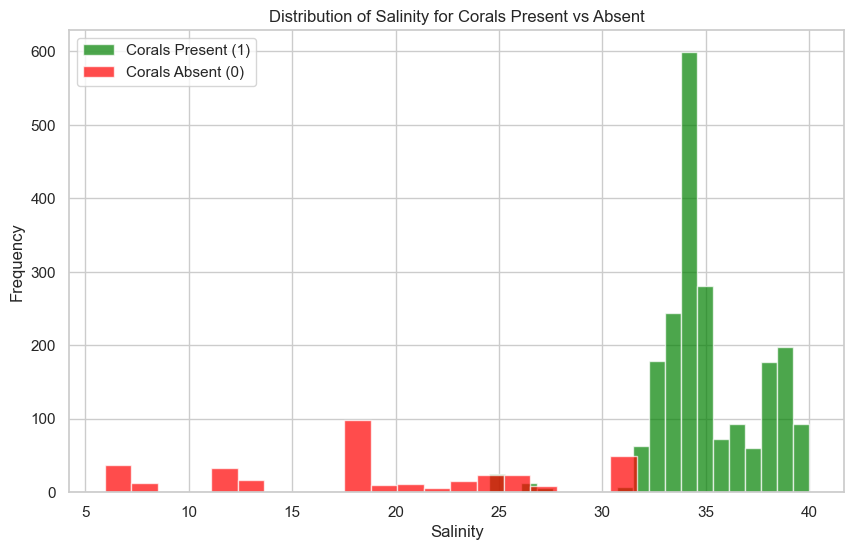

In [11]:
# Plot histograms of salinity for both groups: corals present (1) and corals absent (0).
plt.figure(figsize=(10, 6))
plt.hist(df_saline_coral_yes['salinity'], bins=20, alpha=0.7, label='Corals Present (1)', color='green')
plt.hist(df_saline_coral_no['salinity'], bins=20, alpha=0.7, label='Corals Absent (0)', color='red')
plt.xlabel('Salinity')
plt.ylabel('Frequency')
plt.title('Distribution of Salinity for Corals Present vs Absent')
plt.legend()
plt.show()

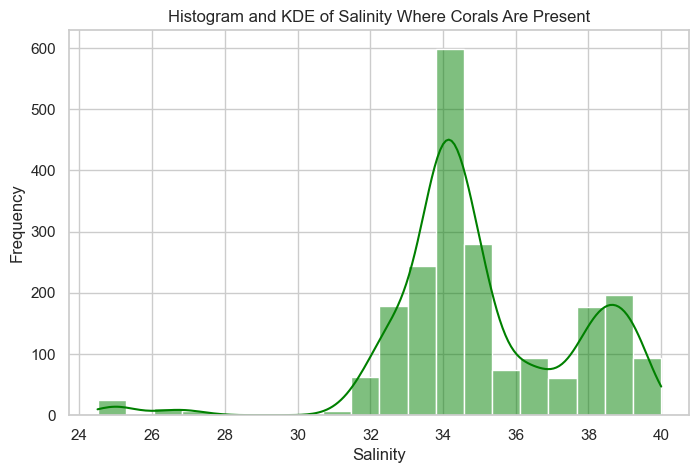

In [12]:
# Plot a histogram with KDE for salinity where corals are present (1).
plt.figure(figsize=(8, 5))
sns.histplot(df_saline_coral_yes['salinity'], bins=20, kde=True, color='green')
plt.xlabel('Salinity')
plt.ylabel('Frequency')
plt.title('Histogram and KDE of Salinity Where Corals Are Present')
plt.show()
# The distribution is not normal, it is skewed to the right.

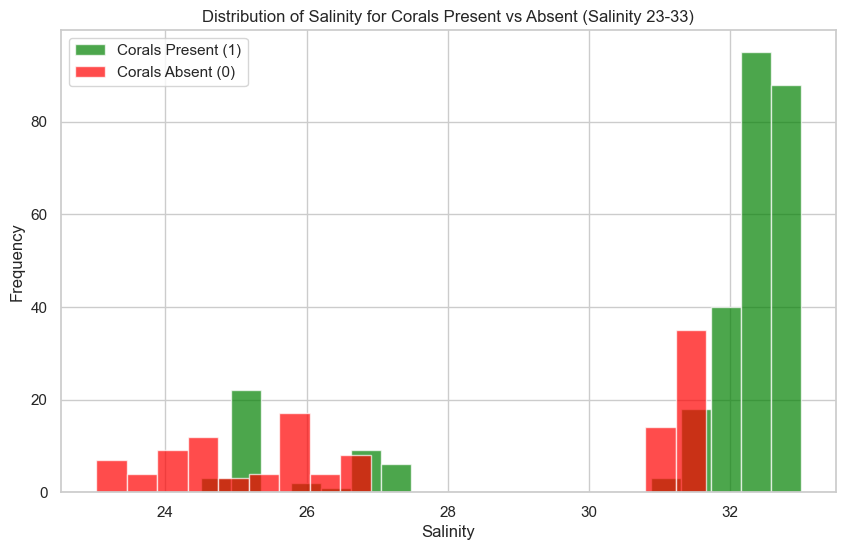

In [13]:
# Investigating the overlap in salinity values between corals present (1) and absent (0).
# Plot histograms of salinity for both groups, only showing values between salinity 23 and 33.
plt.figure(figsize=(10, 6))
plt.hist(
    df_saline_coral_yes[(df_saline_coral_yes['salinity'] >= 23) & (df_saline_coral_yes['salinity'] <= 33)]['salinity'],
    bins=20, alpha=0.7, label='Corals Present (1)', color='green'
)
plt.hist(
    df_saline_coral_no[(df_saline_coral_no['salinity'] >= 23) & (df_saline_coral_no['salinity'] <= 33)]['salinity'],
    bins=20, alpha=0.7, label='Corals Absent (0)', color='red'
)
plt.xlabel('Salinity')
plt.ylabel('Frequency')
plt.title('Distribution of Salinity for Corals Present vs Absent (Salinity 23-33)')
plt.legend()
plt.show()
# This plot shows that there are some overlapping salinity values between corals present (1) and absent (0).
# The overlap is more pronounced in the range of salinity 24-27, where both groups have a significant presence.
# There could also be another factor influencing the presence of corals in this range, I will need to investigate further.
# Also another interesting observation is that there are no corals pressent or absent at salinity

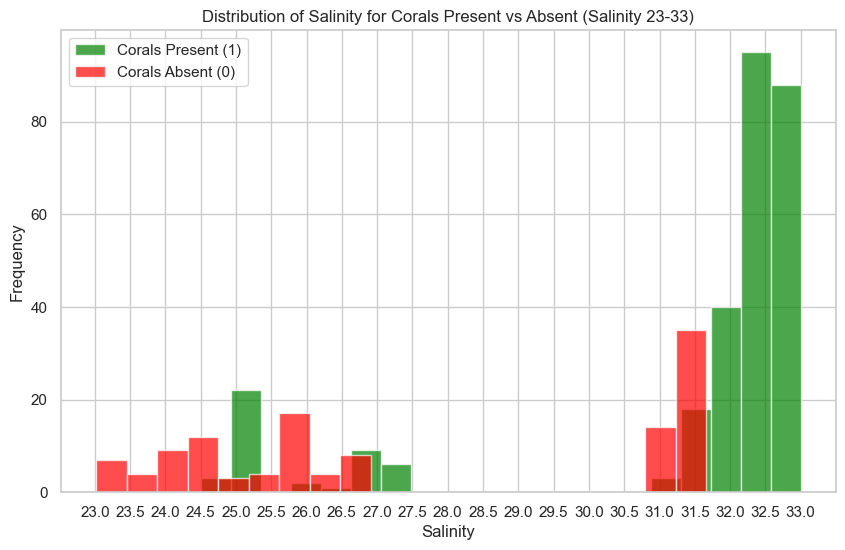

In [14]:
# Investigating the overlap in salinity values between corals present (1) and absent (0).
# Plot histograms of salinity for both groups, only showing values between salinity 23 and 33, with 0.5 decimal ticks on the x-axis.
plt.figure(figsize=(10, 6))
plt.hist(
    df_saline_coral_yes[(df_saline_coral_yes['salinity'] >= 23) & (df_saline_coral_yes['salinity'] <= 33)]['salinity'],
    bins=20, alpha=0.7, label='Corals Present (1)', color='green'
)
plt.hist(
    df_saline_coral_no[(df_saline_coral_no['salinity'] >= 23) & (df_saline_coral_no['salinity'] <= 33)]['salinity'],
    bins=20, alpha=0.7, label='Corals Absent (0)', color='red'
)
plt.xlabel('Salinity')
plt.ylabel('Frequency')
plt.title('Distribution of Salinity for Corals Present vs Absent (Salinity 23-33)')
plt.legend()

# Set x-axis ticks at every 0.5 interval
plt.xticks(np.arange(23, 33.5, 0.5))

plt.show()

# I wanted to investigate at what value of salinity, there is no data for corals present (1) and absent (0).

In [15]:
# Print all columns from the main DataFrame where salinity is between 26.0 and 31.5.
df_salinity_no_data = df[(df['salinity'] >= 27.0) & (df['salinity'] <= 31.0)]
df_salinity_no_data.head(50)
# Between the values where salinity = 27.161095 and salinity = 30.962439, there is a gap in the data, 
# from printing out all columns, there is a clear separation between the different sea names. 
# So sea names and where they are located also influence the presence of corals. Let's look into that next.
# Note: "Sea of Marmara" and "Yellow Sea" might be intesting to plot later

,name,salinity,January_temp,June_temp,area,latitude,longitude,type_of_sea,corals,silt_or_sulfide
1963,Sea of Marmara,27.113651,11.320001,19.609999,11500,40,28,2,1,0
1970,Sea of Marmara,27.197828,11.443329,21.343330,11500,40,28,2,1,0
1986,Sea of Marmara,27.158779,10.789998,22.400000,11500,40,28,2,1,0
1992,Sea of Marmara,27.157621,11.523335,23.800000,11500,40,28,2,1,0
1994,Sea of Marmara,27.134487,11.432217,19.900000,11500,40,28,2,1,0
2002,Sea of Marmara,27.161095,10.584442,24.100000,11500,40,28,2,1,0
2432,Yellow Sea,30.962439,8.021499,20.700000,380000,38,123,3,0,1
2434,Yellow Sea,30.895845,7.766600,19.500000,380000,38,123,3,0,1
2435,Yellow Sea,30.875463,7.709999,19.800000,380000,38,123,3,0,1
2439,Yellow Sea,30.849157,6.921799,20.900000,380000,38,123,3,0,1


In [16]:
# Show only unique values of the 'name' column where salinity is between 24.0 and 32.0.
df_salinity_no_data = df[(df['salinity'] >= 24.0) & (df['salinity'] <= 32.0)]
unique_names_no_data = df_salinity_no_data['name'].unique()
print(unique_names_no_data)
#these are the names of the seas where the overlap in salinity values occurs and no data region of salinity.

['Andaman Sea' 'Bay of Bengal' 'East China Sea' 'East Siberian Sea'
 'Gulf of Thailand' 'Laptev Sea' 'Sea of Marmara' 'Yellow Sea']


In [17]:
# Print all rows from the DataFrame where 'name' is in the specified list.

df_selected_names_overlap = df[df['name'].isin(unique_names_no_data)]
print(df_selected_names_overlap)

             name   salinity  January_temp  June_temp    area  latitude  \
98    Andaman Sea  32.570507     28.207701  29.845098  797700        10   
99    Andaman Sea  31.725037     28.604795  29.109896  797700        10   
100   Andaman Sea  32.356571     28.547297  28.991901  797700        10   
101   Andaman Sea  32.643967     28.031000  29.886599  797700        10   
102   Andaman Sea  32.705059     28.604399  29.320097  797700        10   
...           ...        ...           ...        ...     ...       ...   
2446   Yellow Sea  31.611076      8.349999  19.500000  380000        38   
2447   Yellow Sea  31.468084      8.441801  19.800000  380000        38   
2448   Yellow Sea  31.600788      8.432699  20.700000  380000        38   
2449   Yellow Sea  31.533226      8.102799  19.000000  380000        38   
2450   Yellow Sea  30.992769      7.899599  20.700000  380000        38   

      longitude  type_of_sea  corals  silt_or_sulfide  
98           96            3       1       

In [18]:
pip install nbformat


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [45]:
# Plotting the locations of the selected seas with salinity between 24 and 32 where there is an overlap in salinity values
# where corals are present (1) and absent (0) with no data region of salinity.

# Add a column for salinity rounded to 2 decimal places
df_selected_names_overlap['salinity_'] = df_selected_names_overlap['salinity'].round(2)
df_selected_names_overlap['January_temp_'] = df_selected_names_overlap['January_temp'].round(2)
df_selected_names_overlap['June_temp_'] = df_selected_names_overlap['June_temp'].round(2)

# Define color mapping for corals: 0 = 'no corals' (red), 1 = 'corals present' (green)
color_map = {0: 'no corals', 1: 'corals present'}
color_discrete_map = {'no corals': 'red', 'corals present': 'green'}

fig = px.scatter_geo(
    df_selected_names_overlap,
    lat='latitude',
    lon='longitude',
    text='name',
    title='Locations of Seas with overlapping Salinity values between 24 to 32',
    hover_name='name',
    hover_data={
        'salinity_': True,
        'silt_or_sulfide': True,
        'latitude': False,
        'longitude': False,
        'corals': True,
        'January_temp_': True,
        'June_temp_': True,
        'area': True,
        'type_of_sea': True
    },
    color=df_selected_names_overlap['corals'].map(color_map),  # Map corals to label
    color_discrete_map=color_discrete_map,
)

fig.update_traces(marker=dict(size=10))
fig.update_layout(geo=dict(showland=True, landcolor="LightGray"))
fig.show()

# Column descriptions:
# Silt_or_sulfide = 0 means no silt or sulfide, and 1 means silt or sulfide is present.
#types of sea: 1 - enclosed landlocked, 2 - partly enclosed, 3 - marginal, 4 - no land boundaries

# Plot below indicates the overlapping values of salinity between 24 and 32. 
# It points out that the latitude and longitude of the selected seas are important factors, 
# even if they have similar values of salinity. The temperature and silt/sulfide presence 
# also play a role in the presence of corals.

/var/folders/dn/23wt5_jd2w96xktwt_39x62m0000gn/T/ipykernel_2585/3394435218.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/dn/23wt5_jd2w96xktwt_39x62m0000gn/T/ipykernel_2585/3394435218.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/dn/23wt5_jd2w96xktwt_39x62m0000gn/T/ipykernel_2585/3394435218.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [ ]:
#Writing the map to an HTML file and saved under "Dataset/HTML_maps"
#fig.write_html("Dataset/HTML_maps/geographical_map_overlapping_salinity_values_24_to_32.html")

In [ ]:
# Plotting all the data in one map

# Create a copy of the DataFrame to avoid modifying the original
df_all= df.copy()
# # Add a column for salinity rounded to 2 decimal places
df_all['salinity__'] = df_all['salinity'].round(2)
df_all['January_temp__'] = df_all['January_temp'].round(2)
df_all['June_temp__'] = df_all['June_temp'].round(2)

# Define color mapping for corals: 0 = 'no corals' (red), 1 = 'corals present' (green)
color_map = {0: 'no corals', 1: 'corals present'}
color_discrete_map = {'no corals': 'red', 'corals present': 'green'}

fig = px.scatter_geo(
    df_all,
    lat='latitude',
    lon='longitude',
    text='name',
    title='Map of Coral Reefs present and absent',
    hover_name='name',
    hover_data={
        'salinity__': True,
        'silt_or_sulfide': True,
        'latitude': False,
        'longitude': False,
        'corals': True,
        'January_temp__': True,
        'June_temp__': True,
        'area': True,
        'type_of_sea': True
    },
    color=df_all['corals'].map(color_map),  # Map corals to label
    color_discrete_map=color_discrete_map,
)

fig.update_traces(marker=dict(size=10))
fig.update_layout(geo=dict(showland=True, landcolor="LightGray"))
fig.show()

# Explanation of the map:
# The plot shows the locations of all coral reefs present or absent worldwide.
# The color coding indicates whether corals are present (green) or absent (red).
# From the previous plots on Salinity values, no corals exist below the value of 
# 24.5 regardless of the temperature, latitude, longitude and silt or sulfide present. 
# From this we can confirm that the most important feature is salinity, which is also shown in
# the correlation matrix.

In [ ]:
#Writing the map to an HTML file
# fig.write_html("Dataset/HTML_maps/geographical_map_all_corals.html")